# Predict Car Prices

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format='{:.4f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None) 

## Read Data

In [4]:
df_auto = pd.read_csv("data/car_prices.csv")

In [4]:
df_auto.head()
df_auto.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


## Clean Data

Drop ```car_ID``` based on business knowledge.

In [32]:
df_auto = df_auto.drop(['car_ID'], axis=1)

In [33]:
df_auto.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

#### Standardize on one name for each make of car

Extract company from ```CarName```.

In [34]:
df_auto['CarName'] = df_auto['CarName'].str.split(' ', expand=True)

In [35]:
df_auto['CarName'] = df_auto['CarName'].replace(
    {'maxda': 'mazda', 
     'nissan': 'Nissan', 
     'porcshce': 'porsche', 
     'toyouta': 'toyota', 
     'vokswagen': 'volkswagen', 
     'vw': 'volkswagen'})

#### Make ```Symboling``` Categorical

Though numeric, ```symboling``` functions more like a categorical variable (per dictionary file). 
Cars are initially assigned a risk factor symbol associated with its price. 
Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. 
Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.


In [36]:
df_auto['symboling'] = df_auto['symboling'].astype('str')

Check for duplicates.

In [37]:
df_auto.loc[df_auto.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [38]:
df_auto.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


## Separate numerical and categorical variables

In [39]:
cat_col = df_auto.select_dtypes(include=['object']).columns
num_col = df_auto.select_dtypes(exclude=['object']).columns
df_cat = df_auto[cat_col]
df_num = df_auto[num_col]

## Visualize Data

Visualize mumber of models by make. This is a surrogate for popularity.

Text(0, 0.5, 'Count of Cars')

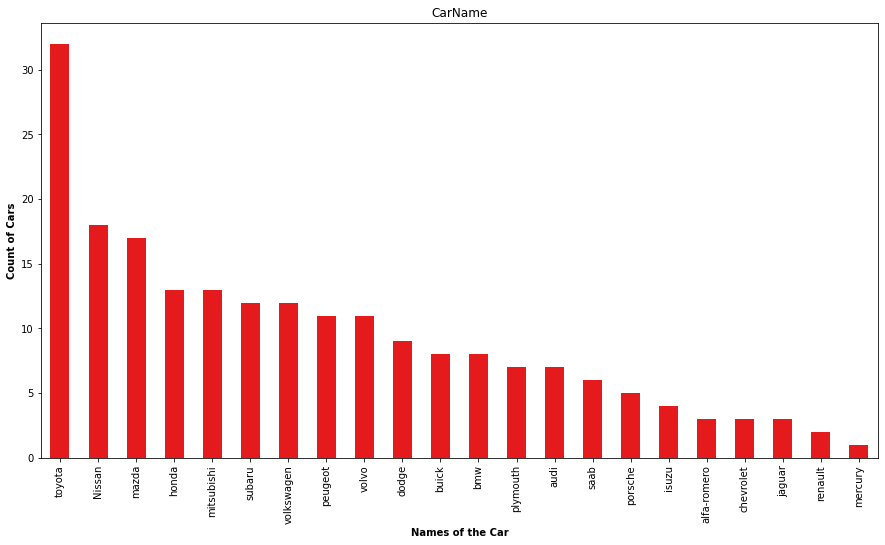

In [40]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]
ax=df_auto['CarName'].value_counts().plot(kind='bar',
                                          stacked=True, 
                                          colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

#### Distribution of car prices

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Count'>

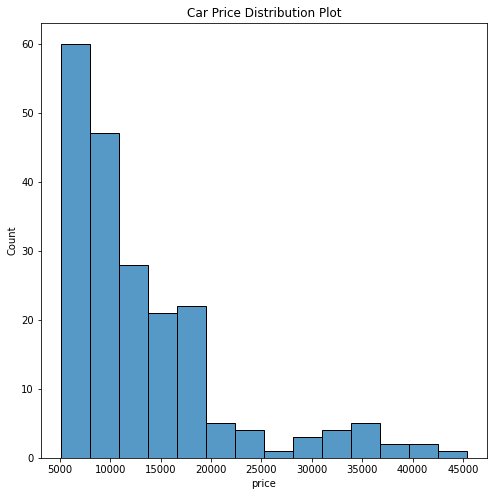

In [41]:
import seaborn as sns
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.histplot(df_auto['price'])

Insights:
- Car prices are right skewed.

#### Analyze Outliers

(205, 25)

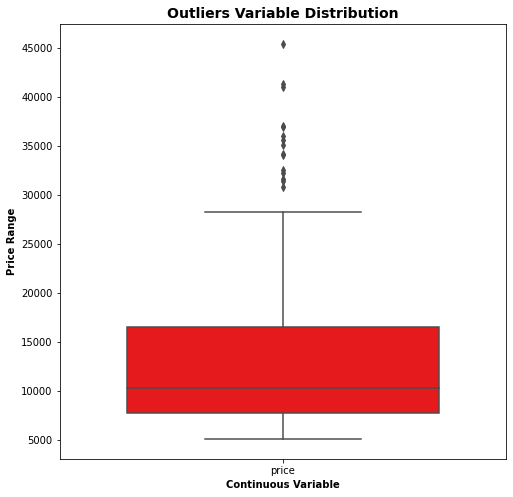

In [42]:

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df_auto[outliers], orient="v", palette="Set1", 
            whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize=14, 
          fontweight='bold')
plt.ylabel("Price Range", fontweight='bold')
plt.xlabel("Continuous Variable", fontweight='bold')
df_auto.shape

Insights:

There are some price ranges above $36,000 which can be termed as outliers but let's not remove those. Rather, we will use standardization scaling.

#### Visualize car size and engine variables

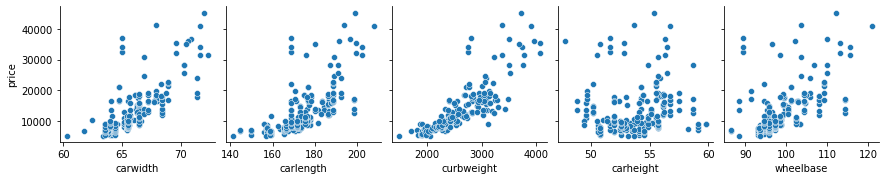

In [43]:
car_size_cols = ['carwidth', 'carlength', 'curbweight', 'carheight', 
                 'wheelbase']
ax = sns.pairplot(data=df_num, y_vars=['price'], x_vars=car_size_cols)

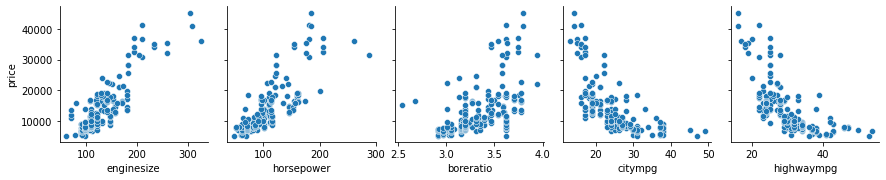

In [44]:
engine_cols = ['enginesize', 'horsepower', 'boreratio', 'citympg', 
               'highwaympg']
ax = sns.pairplot(data=df_num, y_vars=['price'], x_vars=engine_cols)

Insights:
- ```carwidth```, ```carlength```, ```curbweight```, ```enginesize```, ```wheelbase```,  
  ```horsepower```, and ```boreratio``` seem to have a positive correlation 
  with price.
- ```carheight``` does not show any significant trend with price.
- ```citympg``` and ```highwaympg``` seem to have a significant negative correlation with price.

#### Visualize Categorical Variables

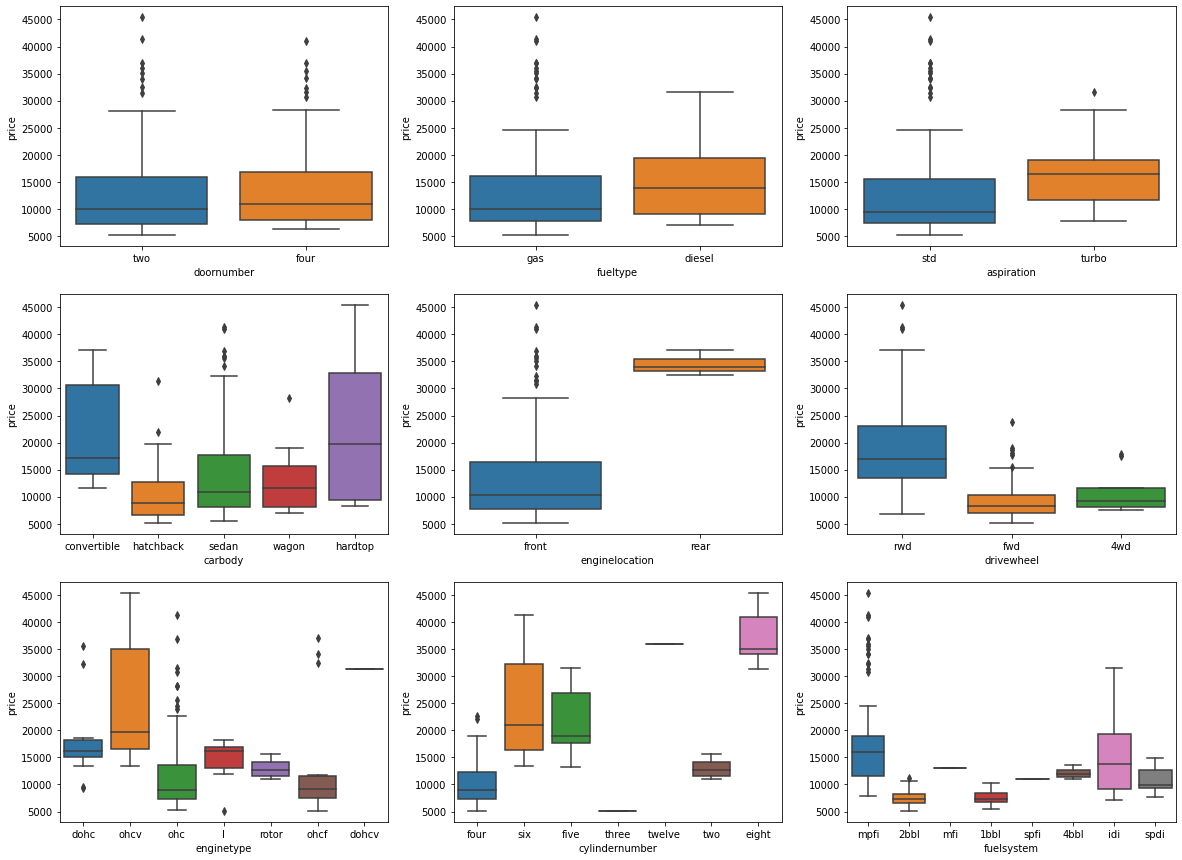

In [45]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df_auto)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df_auto)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df_auto)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df_auto)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_auto)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_auto)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df_auto)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_auto)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_auto)
plt.show()

#### Significant Variables after Visualization
- Engine Type, Fuel Type
- Car Body , Aspiration , Cylinder Number 
- Drivewheel , Curbweight , Car Length 
- Car Length , Car width , Engine Size
- Boreratio , Horse Power , Wheel base 
- citympg , highwaympg , symboling

## Modeling

### Prep Data

In [46]:
sig_col = ['price',
           'carwidth', 'carlength', 'curbweight', 'enginesize', 
           'wheelbase','horsepower', 'citympg', 'highwaympg', 
           'enginetype', 'fueltype', 'aspiration', 'carbody', 
           'cylindernumber', 'drivewheel']

In [47]:
df_auto = df_auto[sig_col]
df_auto.shape

(205, 15)

In [48]:
sig_cat_col = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 
               'enginetype', 'cylindernumber']

In [49]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df_auto['fueltype']=lab.fit_transform(df_auto['fueltype'])
df_auto['aspiration']=lab.fit_transform(df_auto['aspiration'])
df_auto['carbody']=lab.fit_transform(df_auto['carbody'])
df_auto['drivewheel']=lab.fit_transform(df_auto['drivewheel'])
df_auto['enginetype']=lab.fit_transform(df_auto['enginetype'])
df_auto['cylindernumber']=lab.fit_transform(df_auto['cylindernumber'])

In [50]:
df_auto.head()

,price,carwidth,carlength,curbweight,enginesize,wheelbase,horsepower,citympg,highwaympg,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel
0,13495.0000,64.1000,168.8000,2548,130,88.6000,111,21,27,0,1,0,0,2,2
1,16500.0000,64.1000,168.8000,2548,130,88.6000,111,21,27,0,1,0,0,2,2
2,16500.0000,65.5000,171.2000,2823,152,94.5000,154,19,26,5,1,0,2,3,2
3,13950.0000,66.2000,176.6000,2337,109,99.8000,102,24,30,3,1,0,3,2,1
4,17450.0000,66.4000,176.6000,2824,136,99.4000,115,18,22,3,1,0,3,1,0


## Correlation Matrix


In [51]:
corr=df_auto.corr()
corr.style.background_gradient(cmap="inferno")

,price,carwidth,carlength,curbweight,enginesize,wheelbase,horsepower,citympg,highwaympg,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel
price,1.000000,0.759325,0.682920,0.835305,0.874145,0.577816,0.808139,-0.685751,-0.697599,0.049171,-0.105679,0.177926,-0.083976,-0.027628,0.577992
carwidth,0.759325,1.000000,0.841118,0.867032,0.735433,0.795144,0.640732,-0.642704,-0.677218,0.012298,-0.233880,0.300567,0.131710,-0.194074,0.470751
carlength,0.682920,0.841118,1.000000,0.877728,0.683360,0.874587,0.552623,-0.670909,-0.704662,-0.113291,-0.212679,0.234539,0.334433,-0.109585,0.485649
curbweight,0.835305,0.867032,0.877728,1.000000,0.850594,0.776386,0.750739,-0.757414,-0.797465,-0.055265,-0.217275,0.324902,0.128467,-0.047127,0.575111
enginesize,0.874145,0.735433,0.683360,0.850594,1.000000,0.569329,0.809769,-0.653658,-0.677470,0.040766,-0.069594,0.108217,-0.073352,-0.085613,0.524307
wheelbase,0.577816,0.795144,0.874587,0.776386,0.569329,1.000000,0.353294,-0.470414,-0.544082,-0.135577,-0.308346,0.257611,0.401362,-0.184596,0.459745
horsepower,0.808139,0.640732,0.552623,0.750739,0.809769,0.353294,1.000000,-0.801456,-0.770544,0.010301,0.163926,0.241685,-0.153928,0.115612,0.518686
citympg,-0.685751,-0.642704,-0.670909,-0.757414,-0.653658,-0.470414,-0.801456,1.000000,0.971337,-0.085004,-0.255963,-0.202362,0.031697,-0.126422,-0.449581
highwaympg,-0.697599,-0.677218,-0.704662,-0.797465,-0.677470,-0.544082,-0.770544,0.971337,1.000000,-0.078456,-0.191392,-0.254416,-0.007170,-0.085897,-0.452220
enginetype,0.049171,0.012298,-0.113291,-0.055265,0.040766,-0.135577,0.010301,-0.085004,-0.078456,1.000000,0.082695,-0.102963,-0.037024,0.237390,-0.116823


<AxesSubplot:>

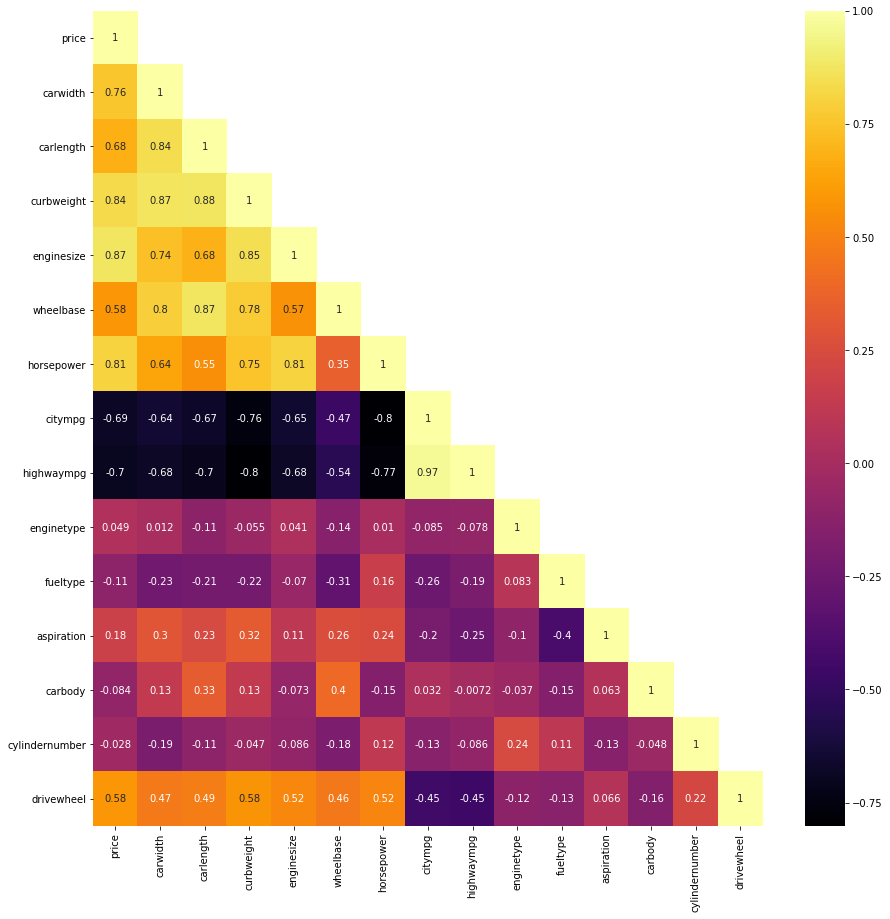

In [52]:
plt.figure(figsize=(15,15))
sns.heatmap(df_auto.corr(), annot=True, cmap='inferno', 
            mask=np.triu(df_auto.corr(),k=1))

## Build Models

In [ ]:
from sklearn.model_selection import (train_test_split,KFold,
                                     cross_val_score,GridSearchCV,
                                     RandomizedSearchCV)
x=df_auto.drop(['price'],axis=1)
y=df_auto['price']
xr,xt,yr,yt=train_test_split(x,y,test_size=0.1)

In [54]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import (r2_score,mean_squared_error,
                             mean_squared_log_error,make_scorer)
from sklearn.pipeline import make_pipeline

In [55]:
lgbm_mod = LGBMRegressor(n_estimators=40)
lgbm_model = make_pipeline(lgbm_mod)
lgbm_model.fit(x, y)

Pipeline(steps=[('lgbmregressor', LGBMRegressor(n_estimators=40))])

In [56]:
print(lgbm_model)

Pipeline(steps=[('lgbmregressor', LGBMRegressor(n_estimators=40))])


In [57]:
kfold = KFold(n_splits=5)
lgbm_score = cross_val_score(lgbm_model, x, y, cv=kfold)
yp=lgbm_model.predict(xt)

lgbm_r2_score = r2_score(yt, yp)
lgbm_sq_err = mean_squared_error(yt, yp)
lgbm_sq_log_err = mean_squared_log_error(yt, yp)
print(lgbm_score)
print(lgbm_r2_score)
print(lgbm_sq_err)
print(lgbm_sq_log_err)

[ 0.78956048  0.74401719 -0.3405842   0.75368345 -0.04488081]
0.9157804164345864
5317747.460037153
0.015434077531016586


In [58]:
rf_mod = RandomForestRegressor(n_estimators=100)
rf_model = make_pipeline(rf_mod)
rf_model.fit(x,y)
print(rf_model)

kfold = KFold(n_splits=5)
rf_score = cross_val_score(rf_model, x, y, cv=kfold)
yp = rf_model.predict(xt)

rf_r2_score = r2_score(yt, yp)
rf_sq_err = mean_squared_error(yt, yp)
rf_sq_log_err = mean_squared_log_error(yt, yp)

print(rf_score)
print(rf_r2_score)
print(rf_sq_err)
print(rf_sq_log_err)

Pipeline(steps=[('randomforestregressor', RandomForestRegressor())])
[ 0.83053568  0.90781004 -1.21850202  0.90519312  0.64804903]
0.9904513845669747
602913.5186402726
0.0031391803623110523


In [ ]:
xgb1 = XGBRegressor()
parameters = {'n_estimators': [500]}
xgb_grid = GridSearchCV(xgb1,parameters,cv = 2)

xgb_grid.fit(x,y)

yp = xgb_grid.predict(xt)

xgb_r2_score = r2_score(yt, yp)
xgb_sq_err = mean_squared_error(yt, yp)
xgb_sq_log_err = mean_squared_log_error(yt, yp)

print(xgb_r2_score)
print(xgb_sq_err)
print(xgb_sq_log_err)